In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DIVISIONS, select_scl5
from triple_agent.reports.specific.banana_breads import (all_banana_bread_percentages,
                                                first_banana_bread_percentages,
                                                banana_split)

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

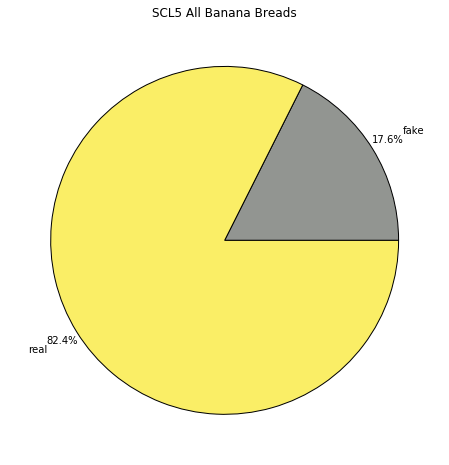

In [5]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 All Banana Breads"))

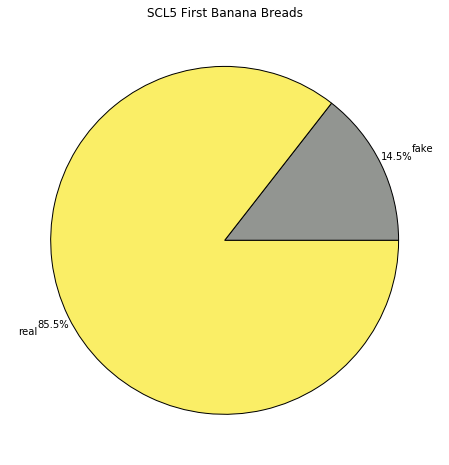

In [6]:
first_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 First Banana Breads")
)

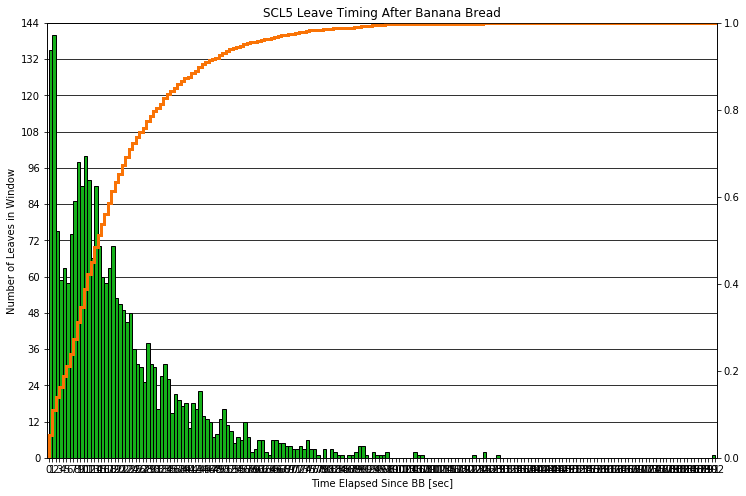

In [7]:
banana_split(scl5_replays, "SCL5 Leave Timing After Banana Bread")

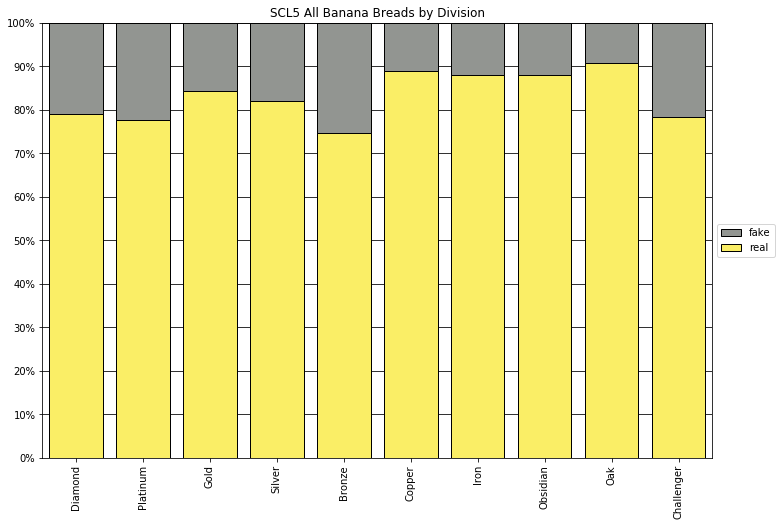

In [10]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 All Banana Breads by Division"),
    data_query=DataQueryProperties(
        groupby=lambda g: g.division,
        category_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True)
)

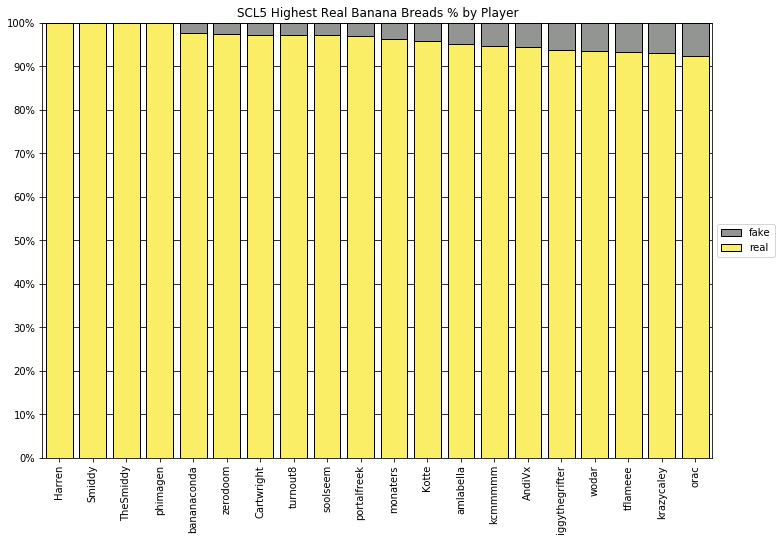

In [18]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 Highest Real Banana Breads % by Player",),
    data_query=DataQueryProperties(
        groupby=lambda g: g.spy,
        percent_normalized_data=True,
        category_order=lambda name_series: -name_series[1]["real"],
        stack_order=["fake", "real"],
        limit=20)
)

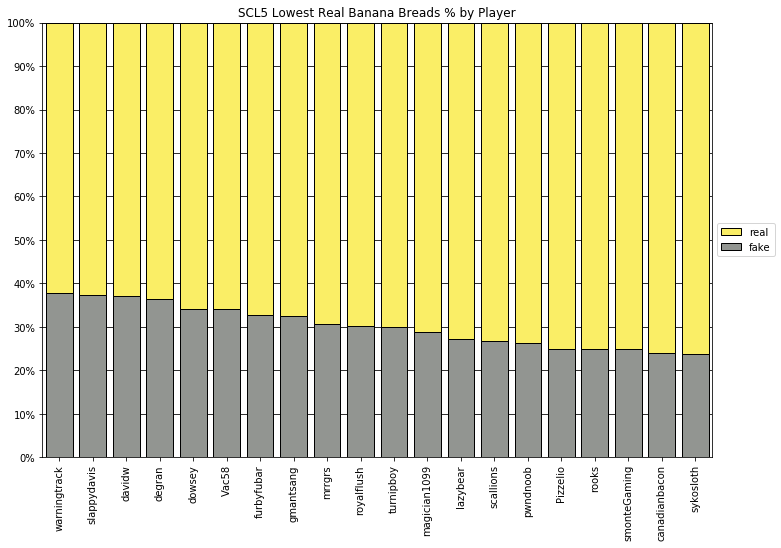

In [17]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 Lowest Real Banana Breads % by Player",),
    data_query=DataQueryProperties(
        groupby=lambda g: g.spy,
        percent_normalized_data=True,
        category_order=lambda name_series: -name_series[1]["fake"],
        stack_order=["real", "fake"],
        limit=20)
)